#### Quantification of NIfTI volumes from a CSV file
**Author: Joseph Turner**

This notebook demonstrates how to quantify the anatomical distribution of voxels in a set of NIfTI volumes. The volumes are specified in a CSV file, which contains the paths to the NIfTI files and the corresponding labels. 

There are a number of optional parameters that can be used to control the quantification process, but the only necessary input is the CSV file itself. 

Optional parameters:
- `roi_col_name`: The column name in the CSV file that contains the path to the NIfTI file. Default is 'roi_2mm'.
- `label_function`: The function that will be used to label the voxels in the NIfTI volumes. Default is `label_csv_custom_atlas`.
    - Note that there are a number of built-in label functions that can be used, such as 
        - `label_csv_custom_atlas`: Quantifies according to a custom mapping of masks to labels, can be built by the user
        - `label_csv_atlas`: Uses a single built-in atlas (such as Harvard-Oxford) to quantify the volumes
        - `label_csv__multi_atlas`: Allows quantification according to multiple built-in atlases
- `proportion_of_anatomical_label`: Boolean value that specifies if quantification values should be expressed as a proportion of the anatomical label that is occupied by the NIfTI volume. Defaults to True.
    - If both `proportion_of_anatomical_label` and `proportion_of_volume` are set to True, `proportion_of_anatomical_label` will take precedence.
    - **If neither is set to True, the quantification will be expressed simply as voxel counts.**
- `proportion_of_volume`: Boolean value that specifies if quantification values should be expressed as a proportion of the total volume of the NIfTI volume that is contained within the anatomical label. Defaults to False. 
    - Cannot be used in conjunction with `proportion_of_anatomical_label=True`.
- `min_threshold`: The minimum threshold for the voxel to be included in quantification. Default is 1 (binary masks). 
    - May be adjusted for continuous volumes such as t-maps.
- `max_threshold`: The maximum threshold for the voxel to be included in quantification. Default is 1 (binary masks).
    - May be adjusted for continuous volumes such as t-maps.
- `atlas`: The name of atlas to be used for quantification.
    - If not specified, defaults to whatever the default atlas is for the chosen label function.
    - Recommended: Joseph's custom atlas if using the `label_csv_custom_atlas` function. 
        - Path = atlas_data\joseph_custom_atlas.csv

Returns:
- `labeled_df`: A dataframe identical to the input csv, but with added labels.
    - Added columns:
        - `total_voxel_count`: The total number of voxels in the NIfTI volume within the threshold range.
        - `predominant_label`: The label that occupies the most voxels in the NIfTI volume. If using Joseph's custom atlas, general labels like 'cerebral_cortex' and 'subcortex' will not be included, as they are too general/large to be useful.
        - In addition to these columns, there will be a column for each label in the atlas, with the quantification value for the NIfTI volume that correspond to that label. 
            - Values may be: 
                1.  a proportion of the anatomical label occupied by the NIfTI volume (use `proportion_of_anatomical_label=True` to get this)
                2. a proportion of the volume of the NIfTI volume that is contained within the anatomical label (use `proportion_of_volume=True` to get this)
                3. the voxel count of the NIfTI volume at that label, depending on the optional parameters used. (If neither `proportion_of_anatomical_label` nor `proportion_of_volume` are set to True, the quantification will be expressed simply as voxel counts.)
- `stats_df`: A dataframe that contains the median, and 25th and 75th percentiles, standard deviation, mean, min, and max of the quantification values for each label in the atlas. 
    - This dataframe is useful for visualizing the anatomical distribution of quantification values across the set of NIfTI volumes. 
    - The labels are the same as the label columns in `labeled_df`.
- `non_zero_frequency_df`: A dataframe that contains the frequency of non-zero quantification values for each label in the atlas. 
    - Also useful for understanding the anatomical distribution of a set of NIfTI volumes
    - The labels are the same as the label columns in `labeled_df`.
- `predominant_frequency_df`: A dataframe that contains the frequency of labels that were the predominant label in the NIfTI volumes.
    - Useful for understanding the anatomical distribution of a set of NIfTI volumes
    - The labels are the same as the label columns in `labeled_df`.
    - Total frequency values sum to 1.0 across the set of NIfTI volumes.


In [35]:
from utils.AnatomicalLabeler import quantification_from_csv, label_csv_atlas, label_csv_multi_atlas, label_csv_custom_atlas

csv_path = r"local_file_info.csv" # CSV file of volumes
roi_col_name = "LocalPath_roi_2mm" # Column name of the NIfTI filepaths to label (defaults to "roi_2mm")

# Optional parameters (uncomment and modify as needed)

# label_function = label_csv_custom_atlas # Replace with label_csv_atlas, label_csv_multi_atlas, or label_csv_custom_atlas
# proportion_of_anatomical_label = True # (sets quantification as proportion of the anatomical label occupied by the NIfTI volume)
# proportion_of_volume = False # (sets quantification as proportion of the anatomical label occupied by the NIfTI volume)
# min_threshold = 1 # (sets the minimum threshold for quantification)
# max_threshold = 1 # (sets the maximum threshold for quantification)
# atlas = r"atlas_data/harvoxf_atlas_list.csv" # (path to the atlas data)

(labeled_df, 
 stats_df, 
 non_zero_frequency_df, 
 predominant_frequency_df) = quantification_from_csv(csv_path=csv_path,
                                                    roi_col_name=roi_col_name,
                                                    # label_function=label_function,
                                                    # proportion_of_anatomical_label=proportion_of_anatomical_label,
                                                    # proportion_of_volume=proportion_of_volume,
                                                    # min_threshold=min_threshold,
                                                    # max_threshold=max_threshold,
                                                    # atlas=atlas
                                                    )
display(labeled_df)
display(stats_df)
display(non_zero_frequency_df)
display(predominant_frequency_df)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:05<00:00,  2.37it/s]


,LocalPath_roi_2mm,LocalPath_t,Region,Subject,total_voxel_count,predominant_label,hippocampus_and_amygdala,cerebral_cortex,subcortex,basal_ganglia,brainstem,thalamus,cerebellum,frontal_lobe,parietal_lobe,insular_lobe,occipital_lobe,temporal_lobe
0,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,hippocampus_and_amygdala,25kakinuma2021,263,temporal_lobe,0.130809,0.000097,0.002432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007786
1,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,cerebral_cortex,36osawa2021,404,frontal_lobe,0.000000,0.002973,0.000605,0.000000,0.000000,0.000000,0.000000,0.004253,0.000000,0.036984,0.000000,0.002011
2,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,subcortex,20gelow2009,307,hippocampus_and_amygdala,0.144005,0.000009,0.003058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000051,0.000000,0.000000,0.005321
3,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,basal_ganglia,59yoshimura2008u2,551,frontal_lobe,0.000000,0.001526,0.003929,0.012227,0.000000,0.000000,0.000000,0.003990,0.000051,0.000359,0.000000,0.000000
4,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,brainstem,63yoshimura2008u7,497,cerebellum,0.000000,0.000000,0.004364,0.000000,0.060176,0.000000,0.011065,0.000000,0.000000,0.000000,0.000000,0.000000
5,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,thalamus,34midaglia2016,358,frontal_lobe,0.000000,0.000644,0.002963,0.000000,0.029074,0.002875,0.000137,0.002320,0.000103,0.000359,0.000000,0.000000
6,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,cerebellum,56yhassan2011,520,cerebellum,0.000000,0.000000,0.005129,0.000000,0.002028,0.000000,0.017349,0.000000,0.000000,0.000000,0.000000,0.000000
7,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,frontal_lobe,30lechowiczglogowska2019,319,frontal_lobe,0.000000,0.001517,0.001476,0.000000,0.000000,0.000000,0.000000,0.003990,0.000000,0.000000,0.000000,0.000000
8,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,parietal_lobe,45stone2018u1,295,parietal_lobe,0.000000,0.001861,0.000828,0.000000,0.000000,0.000000,0.000000,0.000035,0.006454,0.002154,0.000042,0.000000
9,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,C:/Users/josep/a_repos/Takotsubo/ts_top_lesion...,insular_lobe,36osawa2021,404,frontal_lobe,0.000000,0.002973,0.000605,0.000000,0.000000,0.000000,0.000000,0.004253,0.000000,0.036984,0.000000,0.002011


,Label,Median,25th Percentile,75th Percentile,Standard Deviation,Mean,Min,Max
2,subcortex,0.002432,0.001314,0.003276,0.001500,0.002453,0.000605,0.005129
1,cerebral_cortex,0.001081,0.000075,0.001983,0.001178,0.001170,0.000000,0.002973
7,frontal_lobe,0.000018,0.000000,0.003990,0.001996,0.001570,0.000000,0.004253
11,temporal_lobe,0.000016,0.000000,0.002839,0.003101,0.002079,0.000000,0.007786
0,hippocampus_and_amygdala,0.000000,0.000000,0.032702,0.061236,0.033802,0.000000,0.144005
3,basal_ganglia,0.000000,0.000000,0.000000,0.003530,0.001019,0.000000,0.012227
4,brainstem,0.000000,0.000000,0.000507,0.018528,0.007606,0.000000,0.060176
5,thalamus,0.000000,0.000000,0.000000,0.000830,0.000240,0.000000,0.002875
6,cerebellum,0.000000,0.000000,0.000034,0.005685,0.002379,0.000000,0.017349
8,parietal_lobe,0.000000,0.000000,0.000064,0.002142,0.000917,0.000000,0.006454


,Label,Non-zero Frequency
2,subcortex,1.000000
1,cerebral_cortex,0.833333
7,frontal_lobe,0.500000
11,temporal_lobe,0.500000
8,parietal_lobe,0.416667
9,insular_lobe,0.416667
0,hippocampus_and_amygdala,0.250000
4,brainstem,0.250000
6,cerebellum,0.250000
10,occipital_lobe,0.166667


,Label,Predominant Frequency
7,frontal_lobe,0.416667
6,cerebellum,0.166667
8,parietal_lobe,0.166667
11,temporal_lobe,0.166667
0,hippocampus_and_amygdala,0.083333
3,basal_ganglia,0.000000
4,brainstem,0.000000
5,thalamus,0.000000
9,insular_lobe,0.000000
10,occipital_lobe,0.000000


**Visualize results with Matplotlib**  
The dataframes returned in the previous cell can be visualized using Matplotlib. 

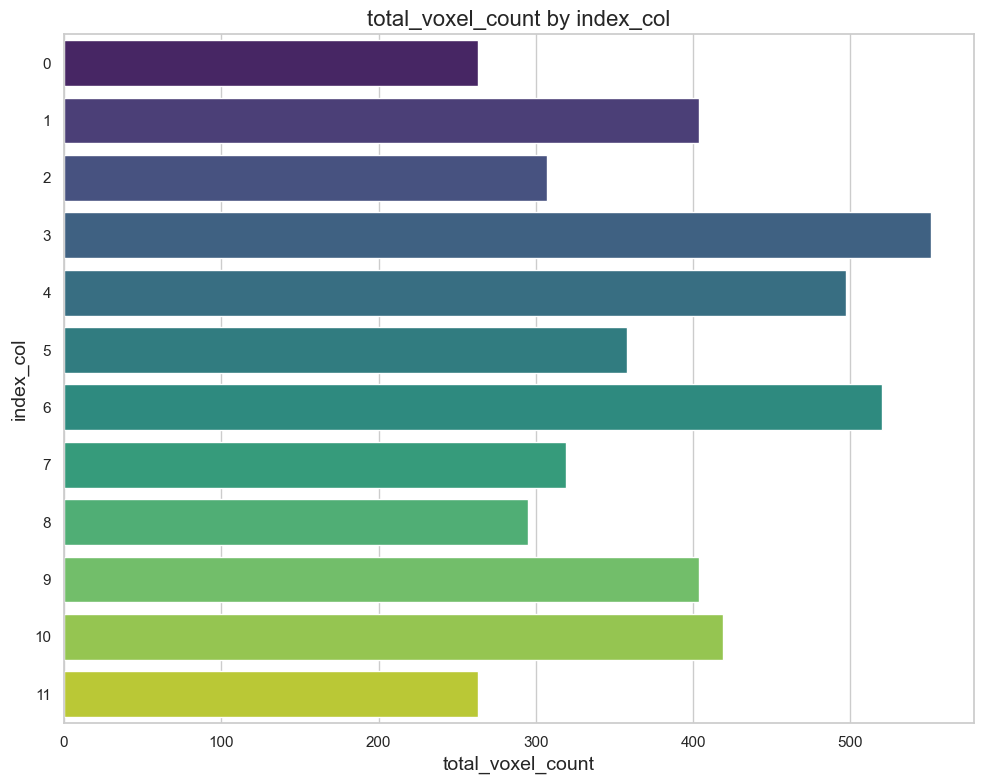

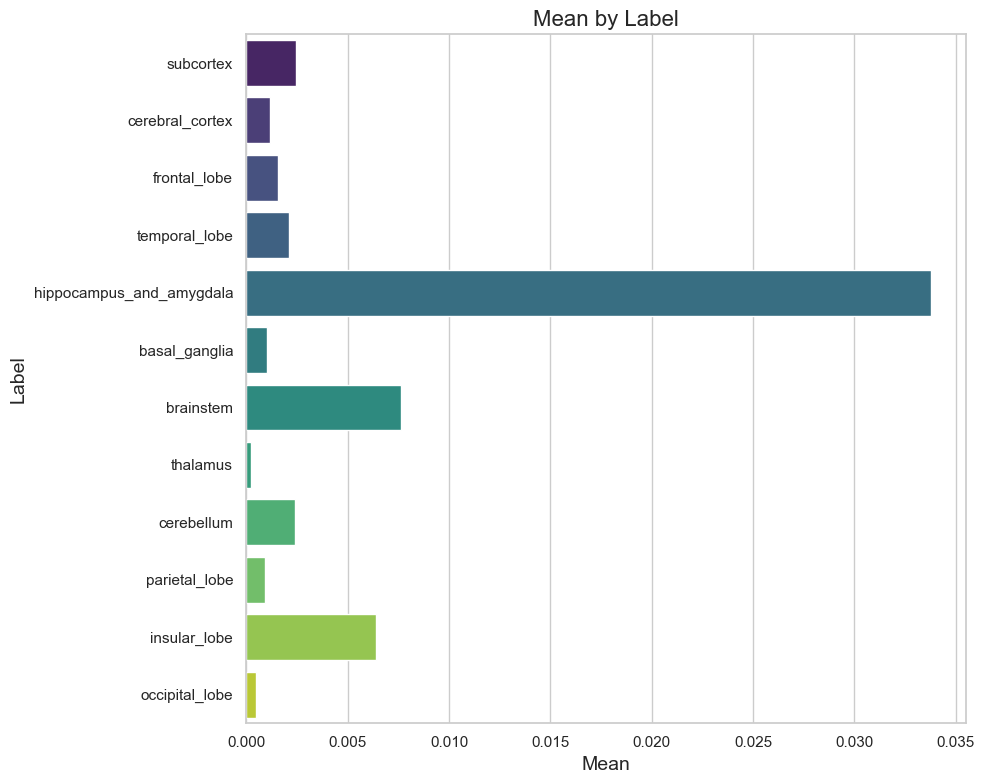

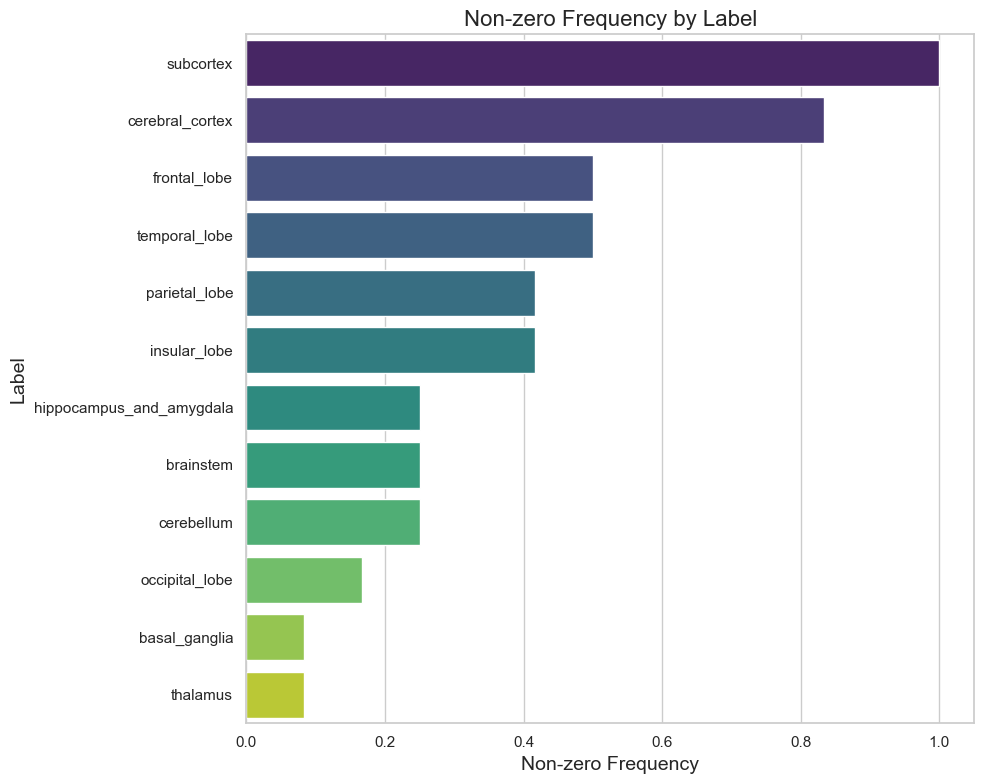

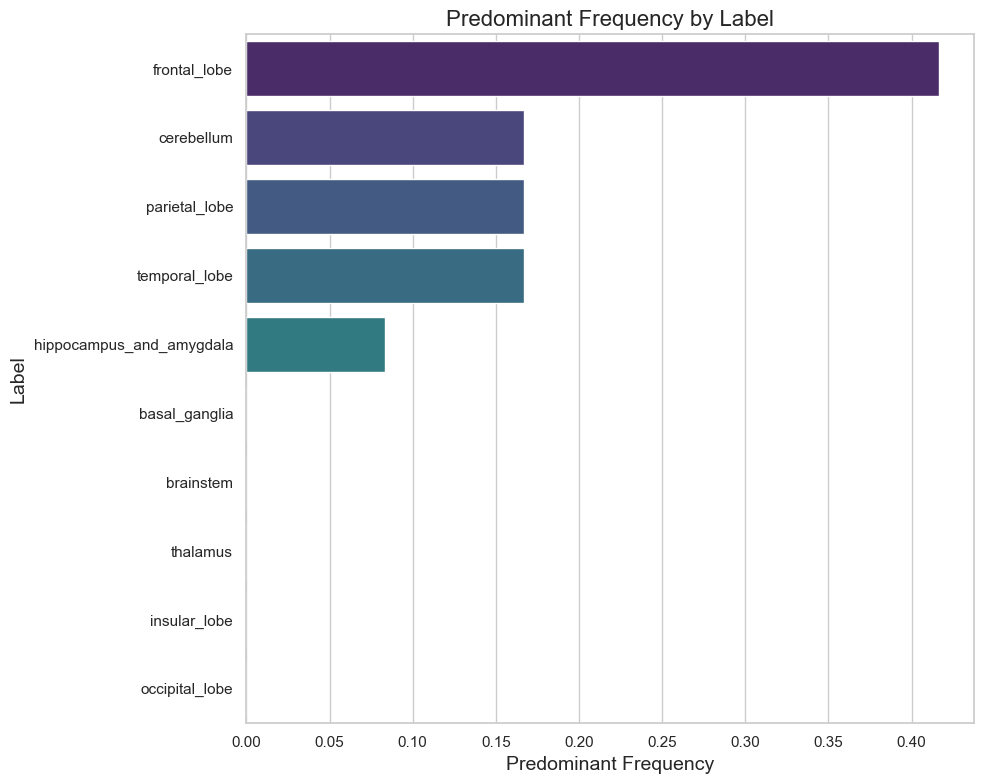

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_chart(df, labels_col_name, values_col_name):
    df = df.copy()
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 8))
    name_orig = labels_col_name
    if labels_col_name == 'index':
        df['index_col'] = df.index
        df['index_col'] = df['index_col'].astype(str)
        labels_col_name = 'index_col'

    bar_plot = sns.barplot(x=values_col_name, y=labels_col_name, data=df, palette="viridis", hue=labels_col_name, legend=False)
    plt.ylabel(labels_col_name, fontsize=14)  # Use the provided labels_col_name

    plt.title(values_col_name + ' by ' + labels_col_name, fontsize=16)
    plt.xlabel(values_col_name, fontsize=14)
    plt.tight_layout()
    plt.legend([],[], frameon=False)
    plt.show()

plot_bar_chart(labeled_df, 'index', 'total_voxel_count')    
plot_bar_chart(stats_df, 'Label', 'Mean')
plot_bar_chart(non_zero_frequency_df, 'Label', 'Non-zero Frequency')
plot_bar_chart(predominant_frequency_df, 'Label', 'Predominant Frequency')

#### Save results to CSV
Here, just replace `output_dir` with the desired output directory.

In [37]:
import os

output_dir = 'output' # Specify the output directory for your CSV files
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

labeled_df.to_csv(os.path.join(output_dir,'labeled_df.csv'), index=False) # Replace filename as needed
stats_df.to_csv(os.path.join(output_dir,'stats_df.csv'), index=False) # Replace filename as needed
non_zero_frequency_df.to_csv(os.path.join(output_dir,'non_zero_frequency_df.csv'), index=False) # Replace filename as needed
predominant_frequency_df.to_csv(os.path.join(output_dir,'predominant_frequency_df.csv'), index=False) # Replace filename as needed

print(f"CSVs saved to {output_dir} directory.")

CSVs saved to output directory.
